# **Introduzione al Machine Learning -- laboratorio 5 e 6**


*   Simulazione Monte Carlo
*   Broadcasting

Problema a) dell'ora 7: sommare uniformi fino a che superano una soglia _a_.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

In [3]:
it = 1000 # numero di simulazioni MC che eseguiremo
t_max = 50 # orizzonte "temporale" massimo di ogni simulazione
a = 5 # soglia per calcolare T

ps = [] # lista dei processi generati, uno per simulazione MC
for i in range(it):
  s = 0 # somma parziale delle vv.aa.
  us = [] # lista delle uniformi generate per la simulazione corrente
  while s<t_max:
    u = uniform.rvs() # genero una uniforme
    us.append(u)      # e la aggiungo alla lista
    s += u            # aggiorno la somma parziale
  ps.append(us)

Visualizziamo le lunghezze di tutte le simulazioni

In [11]:
lenghts = np.array([len(p) for p in ps])

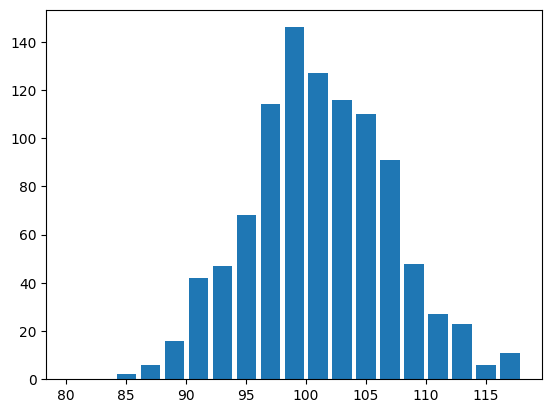

In [16]:
plt.hist(lenghts, bins=list(range(80,120,2)), rwidth=0.8)
plt.show()

Passo alle variabili S

In [17]:
s_ps = [np.cumsum(p) for p in ps]

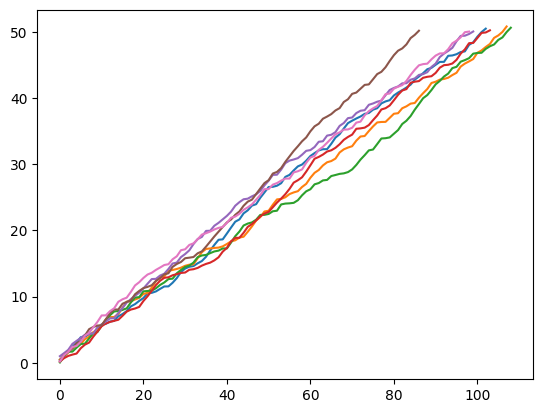

In [19]:
for i in range(7):
  plt.plot(s_ps[i])
plt.show()

In [24]:
s_p = s_ps[0]
sum(s_p < a)

9

In [29]:
t_a = [sum(s_p < a) + 1 for s_p in s_ps]

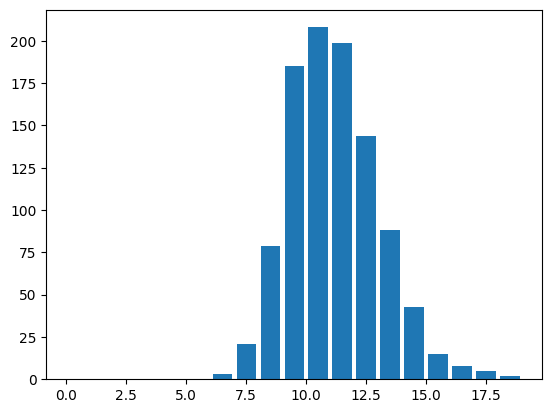

In [30]:
plt.hist(t_a, bins=list(range(20)), rwidth=0.8)
plt.show()

Trovo il valore atteso, con intervallo di confidenza

In [45]:
from scipy.stats import t

n = len(t_a)
conf = 0.95 # 1-α
q = t.ppf(1-(1-conf)/2, df=n-1) # F^-1(1-α/2)
# q = t.isf((1-conf)/2, df=n-1) equivalente
t_avg = np.mean(t_a)
t_std = np.std(t_a, ddof=1)
r = q * t_std / np.sqrt(n)
print(f"L'intervallo di confidenza al {conf:g} è [{t_avg-r:g}, {t_avg+r:g}].")

L'intervallo di confidenza al 0.95 è [10.5617, 10.7963].


Stimiamo P(T≤c)

In [53]:
c = 8
f_c = np.mean(np.array(t_a) <= c)
r_p = q * np.sqrt(f_c*(1-f_c)/n)
print(f"L'intervallo di confidenza al {conf:g} è [{f_c-r_p:g}, {f_c+r_p:g}].")

L'intervallo di confidenza al 0.95 è [0.0841379, 0.121862].


In [ ]:
c = np.arange(25)

Per usare diversi valori di c contemporaneamente, occorre usare il broadcasting.

In [63]:
print(np.expand_dims(np.array(t_a), 1).shape)
print(np.expand_dims(c, 0).shape)
compare = np.expand_dims(np.array(t_a), 1) <= np.expand_dims(c, 0)
print(compare.shape)

(1000, 1)
(1, 25)
(1000, 25)


(25,)


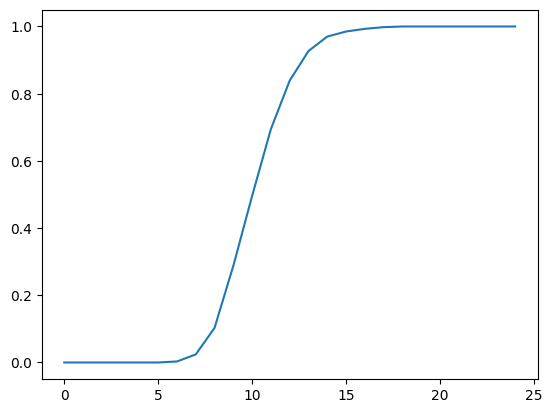

In [66]:
means = np.mean(compare, axis=0)
print(means.shape)
plt.plot(means)
plt.show()

$\color{red}{\text{HW: aggiungere al grafico le due linee che danno l'intervallo di confidenza per ogni valore di c.}}$

Stimiamo il momento quarto della Gaussiana standard. (Che dovrebbe essere 3.)

Notare che scipy usa per la kurtosi la definizione di momento quarto centrato e standardizzato, **diminuito di 3**.  In particolare, viene 0.

In [69]:
from scipy.stats import norm
norm.stats(moments='mvsk')

(0.0, 1.0, 0.0, 0.0)

Con la Simulazione MC

In [80]:
N = 5000000
z = norm.rvs(size=N)  # campione di Gaussiane standard
x = z**4              # campione delle potenze quarte
x_avg = np.mean(x)
r = 2 * np.std(x) / np.sqrt(N)
print(f"L'intervallo di confidenza al 95% è [{x_avg-r:g}, {x_avg+r:g}].")

L'intervallo di confidenza al 95% è [2.99506, 3.01258].


Con l'integrazione numerica

In [87]:
from scipy.integrate import quad

def funz(x):
    return(x ** 4 * norm.pdf(x))

funzz = lambda x: x ** 4 * norm.pdf(x)

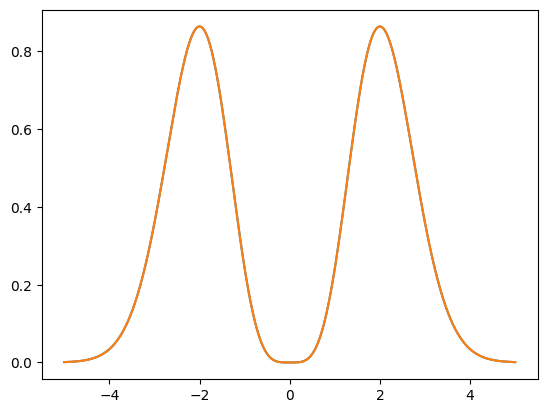

In [90]:
xrange = np.linspace(-5, 5, 1000)
plt.plot(xrange, funz(xrange))
plt.plot(xrange, funzz(xrange))
plt.show()

In [89]:
quad(funzz, -np.inf, np.inf)

(3.0000000000000053, 1.2043244026618655e-08)

In [91]:
quad(funzz, -10, 10)

(3.0, 6.32486480097366e-11)

In [93]:
quad(funzz, 0, 10)

(1.5, 3.1624157471414605e-11)

Stimo o calcolo l'entropia di una Gamma-Poisson

In [100]:
from scipy.stats import nbinom

n = 4
p = 0.1
nb = nbinom(n=n, p=p)
print(nb.entropy())

4.272837953277847


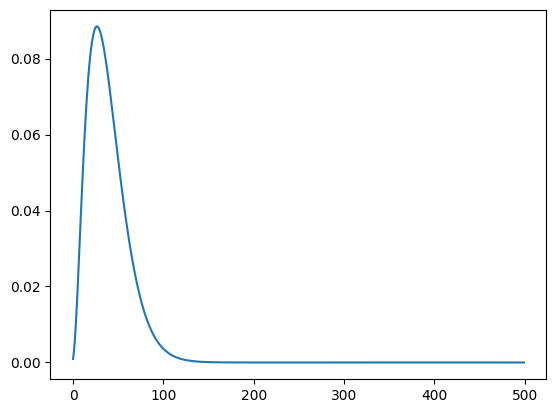

4.272837953295727


In [106]:
k = np.arange(500)
pmf = nb.pmf(k)
adds = -pmf * np.log(pmf)
plt.plot(adds)
plt.show()
print(sum(adds))

$\log_a(x)=\frac{1}{\log_b(a)}\cdot \log_b(x)$

* Logaritmo in base 2: 'bit'
* Logaritmo in base $e$: 'nat'